<img src="https://nyp-aicourse.s3.ap-southeast-1.amazonaws.com/agods/nyp_ago_logo.png" width='300'/>

Welcome to the lab! Before we get started here are a few pointers on using this notebooks.

1. The notebook is composed of cells; cells can contain code which you can run, or they can hold text and/or images which are there for you to read.

2. You can execute code cells by clicking the ```Run``` icon in the menu, or via the following keyboard shortcuts ```Shift-Enter``` (run and advance) or ```Ctrl-Enter``` (run and stay in the current cell).

3. To interrupt cell execution, click the ```Stop``` button on the toolbar or navigate to the ```Kernel``` menu, and select ```Interrupt ```.
    

# Final Exercise

In this final exercise, we will apply our data visualization skills on worldwide COVID-19 dataset.

In [57]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as md

In [66]:
# set panda option to display rows up to 200
pd.options.display.max_rows = 200

In [67]:
data_file = 'datasets/owid-covid-data-filtered.csv'
df = pd.read_csv(data_file)

### Part 1

Display all the column information and answer the following questions: 
1. How many columns are there? 
2. How many entries (rows) are there? 
3. Do we have any null values?
3. What is the datatype of 'date' column? 

Change the date column into appropriate datatype (*Hint*:  use `pd.to_datetime()`)

<details><summary>Click here for solution</summary>
    
1. there are total of 66 columns
2. there are 148893 entries 
3. Yes
4. data column is object (string) type
    
```python
## TODO: 

# display the info 
df.info()

# change the datatype of date column
df['date'] = pd.to_datetime(df['date'])

```
</details>

In [68]:
## TODO: 

# display the info 
df.info()

# change the datatype of date column
df['date'] = pd.to_datetime(df['date'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148893 entries, 0 to 148892
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    148893 non-null  object 
 1   continent                                   148893 non-null  object 
 2   location                                    148893 non-null  object 
 3   date                                        148893 non-null  object 
 4   total_cases                                 139565 non-null  float64
 5   new_cases                                   139457 non-null  float64
 6   new_cases_smoothed                          138353 non-null  float64
 7   total_deaths                                122701 non-null  float64
 8   new_deaths                                  122582 non-null  float64
 9   new_deaths_smoothed                         121540 non-null  float64
 

### Part 2

Let us find the top 10 countries with the most number of cases of Covid-19. 

To do this, you can follow the following steps: 
1. group the data by 'location' and sum the 'new_cases'. 
2. Sort the resultant series with descending order 
3. Use slicing to take the first 10 rows

In [69]:
## TODO: 

# Step 1: Use groupby() and then sum()

total_cases_grouped = df.groupby('location')['new_cases'].sum()

# Step 2: Use sort_values() to sort the total cases in descending order 

total_cases_grouped = total_cases_grouped.sort_values(ascending=False)

# Step 3: Take the first 10 rows. To get the country names as list, take the index of the series.

top10_countries = total_cases_grouped[:10].index
# top_20_countries = ??
print(top10_countries)

Index(['United States', 'India', 'Brazil', 'United Kingdom', 'France',
       'Russia', 'Turkey', 'Germany', 'Spain', 'Iran'],
      dtype='object', name='location')


We will now find the total number of cases and total number of deaths of the top 20 countries and create a new dataframe with these information.

In [64]:
total_cases = total_cases_grouped[0:10].values # Total number of Cases in Top 20 Countries 

# Total deaths of top 10 countries 
total_deaths_grouped = df.groupby('location')['new_deaths'].sum()
total_deaths = total_deaths_grouped[top10_countries].values 

# Create a dataframe consisting of Country, Total Cases, Total Deaths information
total_cases_deaths_df = pd.DataFrame({'Country': top10_countries, 'Total Cases': total_cases, 'Total Deaths': total_deaths})
print(total_cases_deaths_df)

          Country  Total Cases  Total Deaths
0   United States   54904394.0      825614.0
1           India   34861579.0      474113.0
2          Brazil   22186757.0      619334.0
3  United Kingdom   12945110.0      177395.0
4          France   10441781.0      124192.0
5          Russia   10320405.0      302671.0
6          Turkey    8659325.0       82361.0
7         Germany    7109182.0      111611.0
8           Spain    6379581.0       90146.0
9            Iran    6194401.0      131606.0


The above data is better visualized through a bar plot, where each country has one bar for the total number of cases and a second bar for the total number of deaths.

To do this we will convert the data into the following format: 

<img src='images/covid_long_form.png' />

We will use a new variable 'Metric' to indicate the type of counts ("Total Cases" or "Total Deaths") and a value variable "Case Count'.  

### Part 3

Convert the dataframe into another form using the `melt()` function where each country has two rows – one for total cases and the second for total deaths. Plot the converted dataframe using the `barplot()` function of the seaborn library.

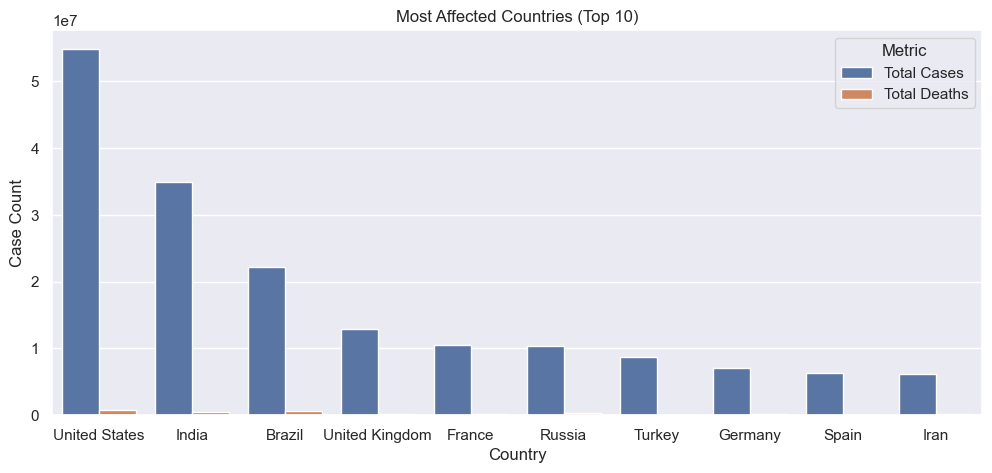

In [37]:
## TODO: 

# Step 1: convert to long form, with id variable = 'Country', 
#         value variables = 'Total Cases', 'Total Deaths', 
#         variable name = 'Metric', and value name as 'Case Count'

total_cases_deaths_long = pd.melt(total_cases_deaths_df, 
                                  id_vars=['Country'], 
                                  value_vars=['Total Cases', 'Total Deaths'], 
                                  var_name='Metric', 
                                  value_name='Case Count')

total_cases_deaths_long.sample(10)


# Step 2: plt the sns barplot, with title "Most Affected Countries (Top 20)". 
sns.set_theme()
plt.figure(figsize=(12, 5))
sns.barplot(data=total_cases_deaths_long, x='Country', y='Case Count', hue='Metric')
plt.title('Most Affected Countries (Top 10)')
plt.show()

### Part 4 

Let's visualize the top 10 countries with the most testing rate.  Testing rate is defined here as total tests divided by the total population of the country

 

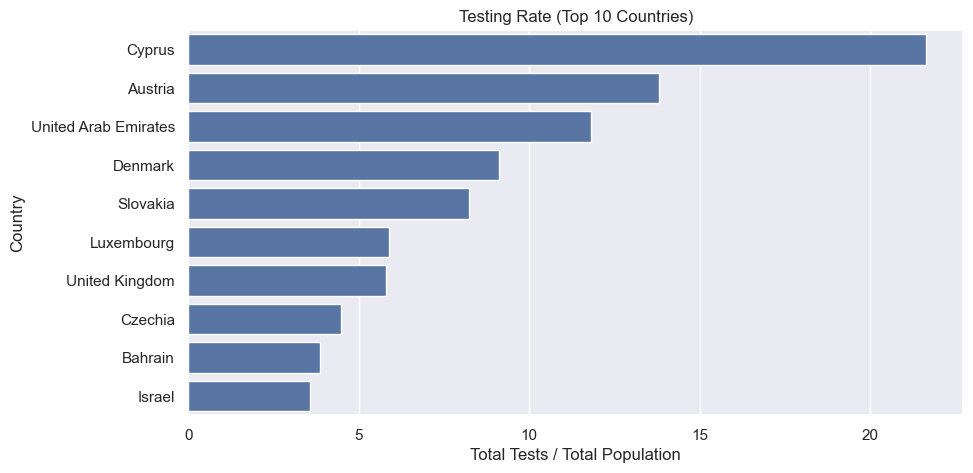

In [93]:
## TODO: Complete the code

# Step 1: Find the total tests grouped by country 

total_tests_grouped = df.groupby('location')['new_tests'].sum()
total_tests = total_tests_grouped.values

# Step 2: Find the total population grouped by country. 
#         We will just take the last value of the group. You can take the last value by using nth(-1).

total_population = df.groupby('location')['population'].nth(-1)

# Step 3: Compute the testing rate and sort them according to descending order. Take the top 10

testing_rate = (total_tests / total_population).sort_values(ascending = False)
top10_testing_rate = testing_rate[:10]

# # Step 4: Use seaborn horizontal bar chart to compare the top 10 countries, Set the appropriate title and x, y labels

sns.set_theme()
plt.figure(figsize=(10, 5))
sns.barplot(y = top10_testing.index, x = top10_testing.values, orient = "h", color="b")
plt.title('Testing Rate (Top 10 Countries)')
plt.xlabel('Total Tests / Total Population')
plt.ylabel('Country')
plt.show()

### Part 5

Let us now compare the rate of increase of coronavirus cases between the two countries: United States and India. This will be a date series visualization with the dates in increasing order of time on the X-axis, and the number of cases on the Y-axis. 

As not all the dates are available for each country, we only want to display those dates where both country has data on 'total_cases'.  We can do this by first extract the date and total cases columns of each country into two separate dataframes. These two dataframes are then merged into a single dataframe using an ‘inner join’ operation on the date column. An inner join ensures that only those date values are included which are present in both dataframes being merged.

          date  total_cases_x  total_cases_y
697 2021-12-27     34799691.0     52911395.0
698 2021-12-28     34808886.0     53283780.0
699 2021-12-29     34822040.0     53794661.0
700 2021-12-30     34838804.0     54392462.0
701 2021-12-31     34861579.0     54904395.0


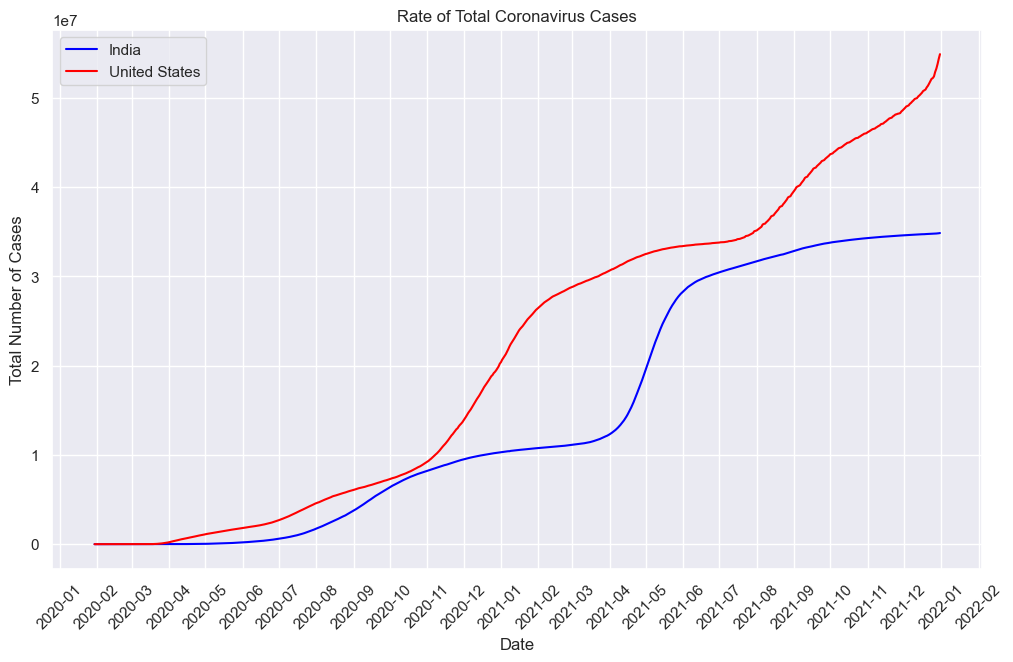

In [95]:
## TODO:

# Step 1: Extract the date and total cases of India and US into a separate data frame 

country1 = 'India'
country2 = 'United States'

country1_data = df.loc[df['location'] == country1]
country1_cases = country1_data[['date','total_cases']]

country2_data = df.loc[df['location'] == country2]
country2_cases = country2_data[['date','total_cases']]


# Step 2: Merge the two dataframes using inner join on date

datewise_cases = country1_cases.merge(country2_cases, how = 'inner', on = 'date') 
print(datewise_cases.tail())

# Step 3: Plot the merged dataframe

plt.figure(figsize=(12, 7))
plt.plot(datewise_cases['date'].values, datewise_cases['total_cases_x'].values, color='blue', label=country1)
plt.plot(datewise_cases['date'].values, datewise_cases['total_cases_y'].values, color='red', label=country2)
ax = plt.gca()
ax.xaxis.set_major_locator(md.MonthLocator())
ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m'))
plt.xticks(rotation = 45)
plt.xlabel('Date')
plt.ylabel('Total Number of Cases')
plt.title('Rate of Total Coronavirus Cases')
plt.legend()
plt.show()

### Part 6

We would like to know if there is some correlation between between death rate and the diabetes prevalence of countries in Asia continent.
We will compute the death rate as $\frac{total deathts}{population}*100$

You will create a dataframe that consists of the following columns: 'Death Rate', 'Diabetes Prevalence' 

C:\Users\markk\miniconda3\envs\dlenv\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


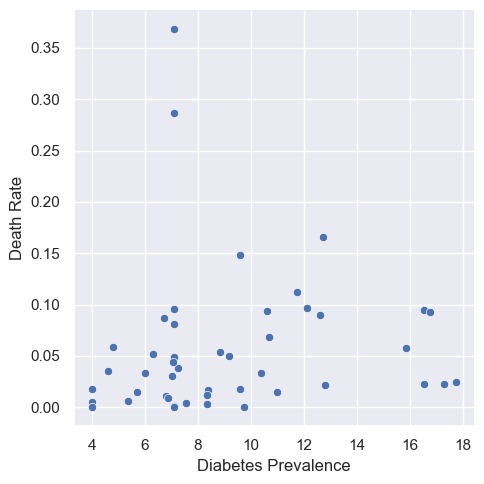

In [126]:
## TODO: 


# Step 1: create a subset of asia countries 

df_asia = df.loc[df['continent'] == 'Asia']
df_asia_filtered  = df_asia[ ['location', 'new_deaths', 'population', 'diabetes_prevalence']]
df_asia_filtered.dropna(inplace=True)

# Step 2: get the total deaths, total population, diabetes prevalence of each countries

total_deaths = df_asia.groupby('location')['new_deaths'].sum()
total_population = df_asia.groupby('location')['population'].nth(-1)
diabetes_prevalence = df_asia.groupby('location')['diabetes_prevalence'].nth(-1)


# Step 3: Compute the  death rate 

death_rate = total_deaths / total_population * 100



# Step 4: Create a dataframe that has two columns: 'Death Rate', 'Diabetes Prevalence'
df_corr = pd.DataFrame( { 'Death Rate': death_rate, 'Diabetes Prevalence': diabetes_prevalence.values })
df_corr



# Step 5: Plot the relational plot between "Death Rate' vs 'Diabetes Prevalence'
sns.set_theme()
sns.relplot(data=df_corr, x='Diabetes Prevalence', y='Death Rate')



### Part 7

Plot the daily new covid cases of Singapore, between the period 1st Jan 2020 and 31st Dec 2020.  
Identify the peak, that signifies the outbreak.  What do you think is the event that caused the outbreak ? Annotate the peak with the event description.

C:\Users\markk\AppData\Local\Temp\ipykernel_43952\1859178451.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_sg_2020 = df_sg[ (df['date'] >= '2020-01-01') & (df['date'] <= '2020-12-31')]
C:\Users\markk\AppData\Local\Temp\ipykernel_43952\1859178451.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  date = df_sg_2020[ df['new_cases'] == max_cases]['date']


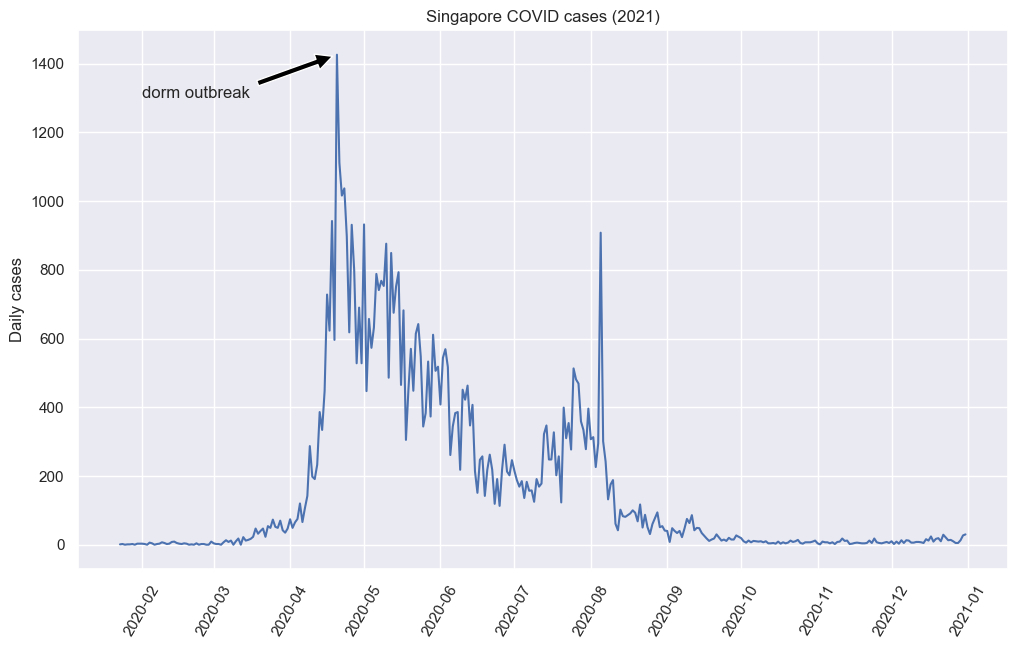

In [198]:
# Step1: Create a subset for Singapore new cases from 2020-01-01 to 2020-12-31

df_sg = df[df.location == 'Singapore'][['date','new_cases']]
df_sg_2020 = df_sg[ (df['date'] >= '2020-01-01') & (df['date'] <= '2020-12-31')]

# Step 2: Create a plot and set the date format to %Y-%m and major locator at monthly interval

import matplotlib.dates as md 

plt.figure(figsize=(12, 7))
plt.plot(df_sg_2020['date'], df_sg_2020['new_cases'])
ax = plt.gca()
ax.xaxis.set_major_locator(md.MonthLocator(interval=1))
ax.xaxis.set_tick_params(rotation=60)
plt.ylabel('Daily cases')
plt.title('Singapore COVID cases (2021)')

# Step 3: Plot the line chart, annotate the peak with the event name

max_cases = df_sg_2020['new_cases'].max()
date = df_sg_2020[ df['new_cases'] == max_cases]['date']
occur = date.dt.strftime('%Y-%m-%d')
plt.annotate('dorm outbreak', xy=(occur, max_cases), xytext=(datetime.datetime(2020, 2, 1), 1300), arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()


Congratulations! You have come to the end of the module! 